**Import Necessary Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Concrete_Data_Yeh.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Data Read**

In [ ]:
column_names = df.columns.tolist() #df.coloumn returns the pandas index object with coloumn dataframe.

print("Attributes (Columns) of the Dataset:") #printout or display the coloumn attributes
print(column_names)

Attributes (Columns) of the Dataset:
['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']


In [ ]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())




Missing values in the dataset:
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


In [ ]:
df.duplicated().sum()

25

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Get the number of rows and columns in the DataFrame
num_rows = df.shape[0]
num_columns = df.shape[1]

# Print the total size of the DataFrame
print("Total Size of the Dataframe:")
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Total Size of the Dataframe:
Number of Rows: 1005
Number of Columns: 9


In [ ]:
# Generate descriptive statistics of the "df" object
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Data Visualization**

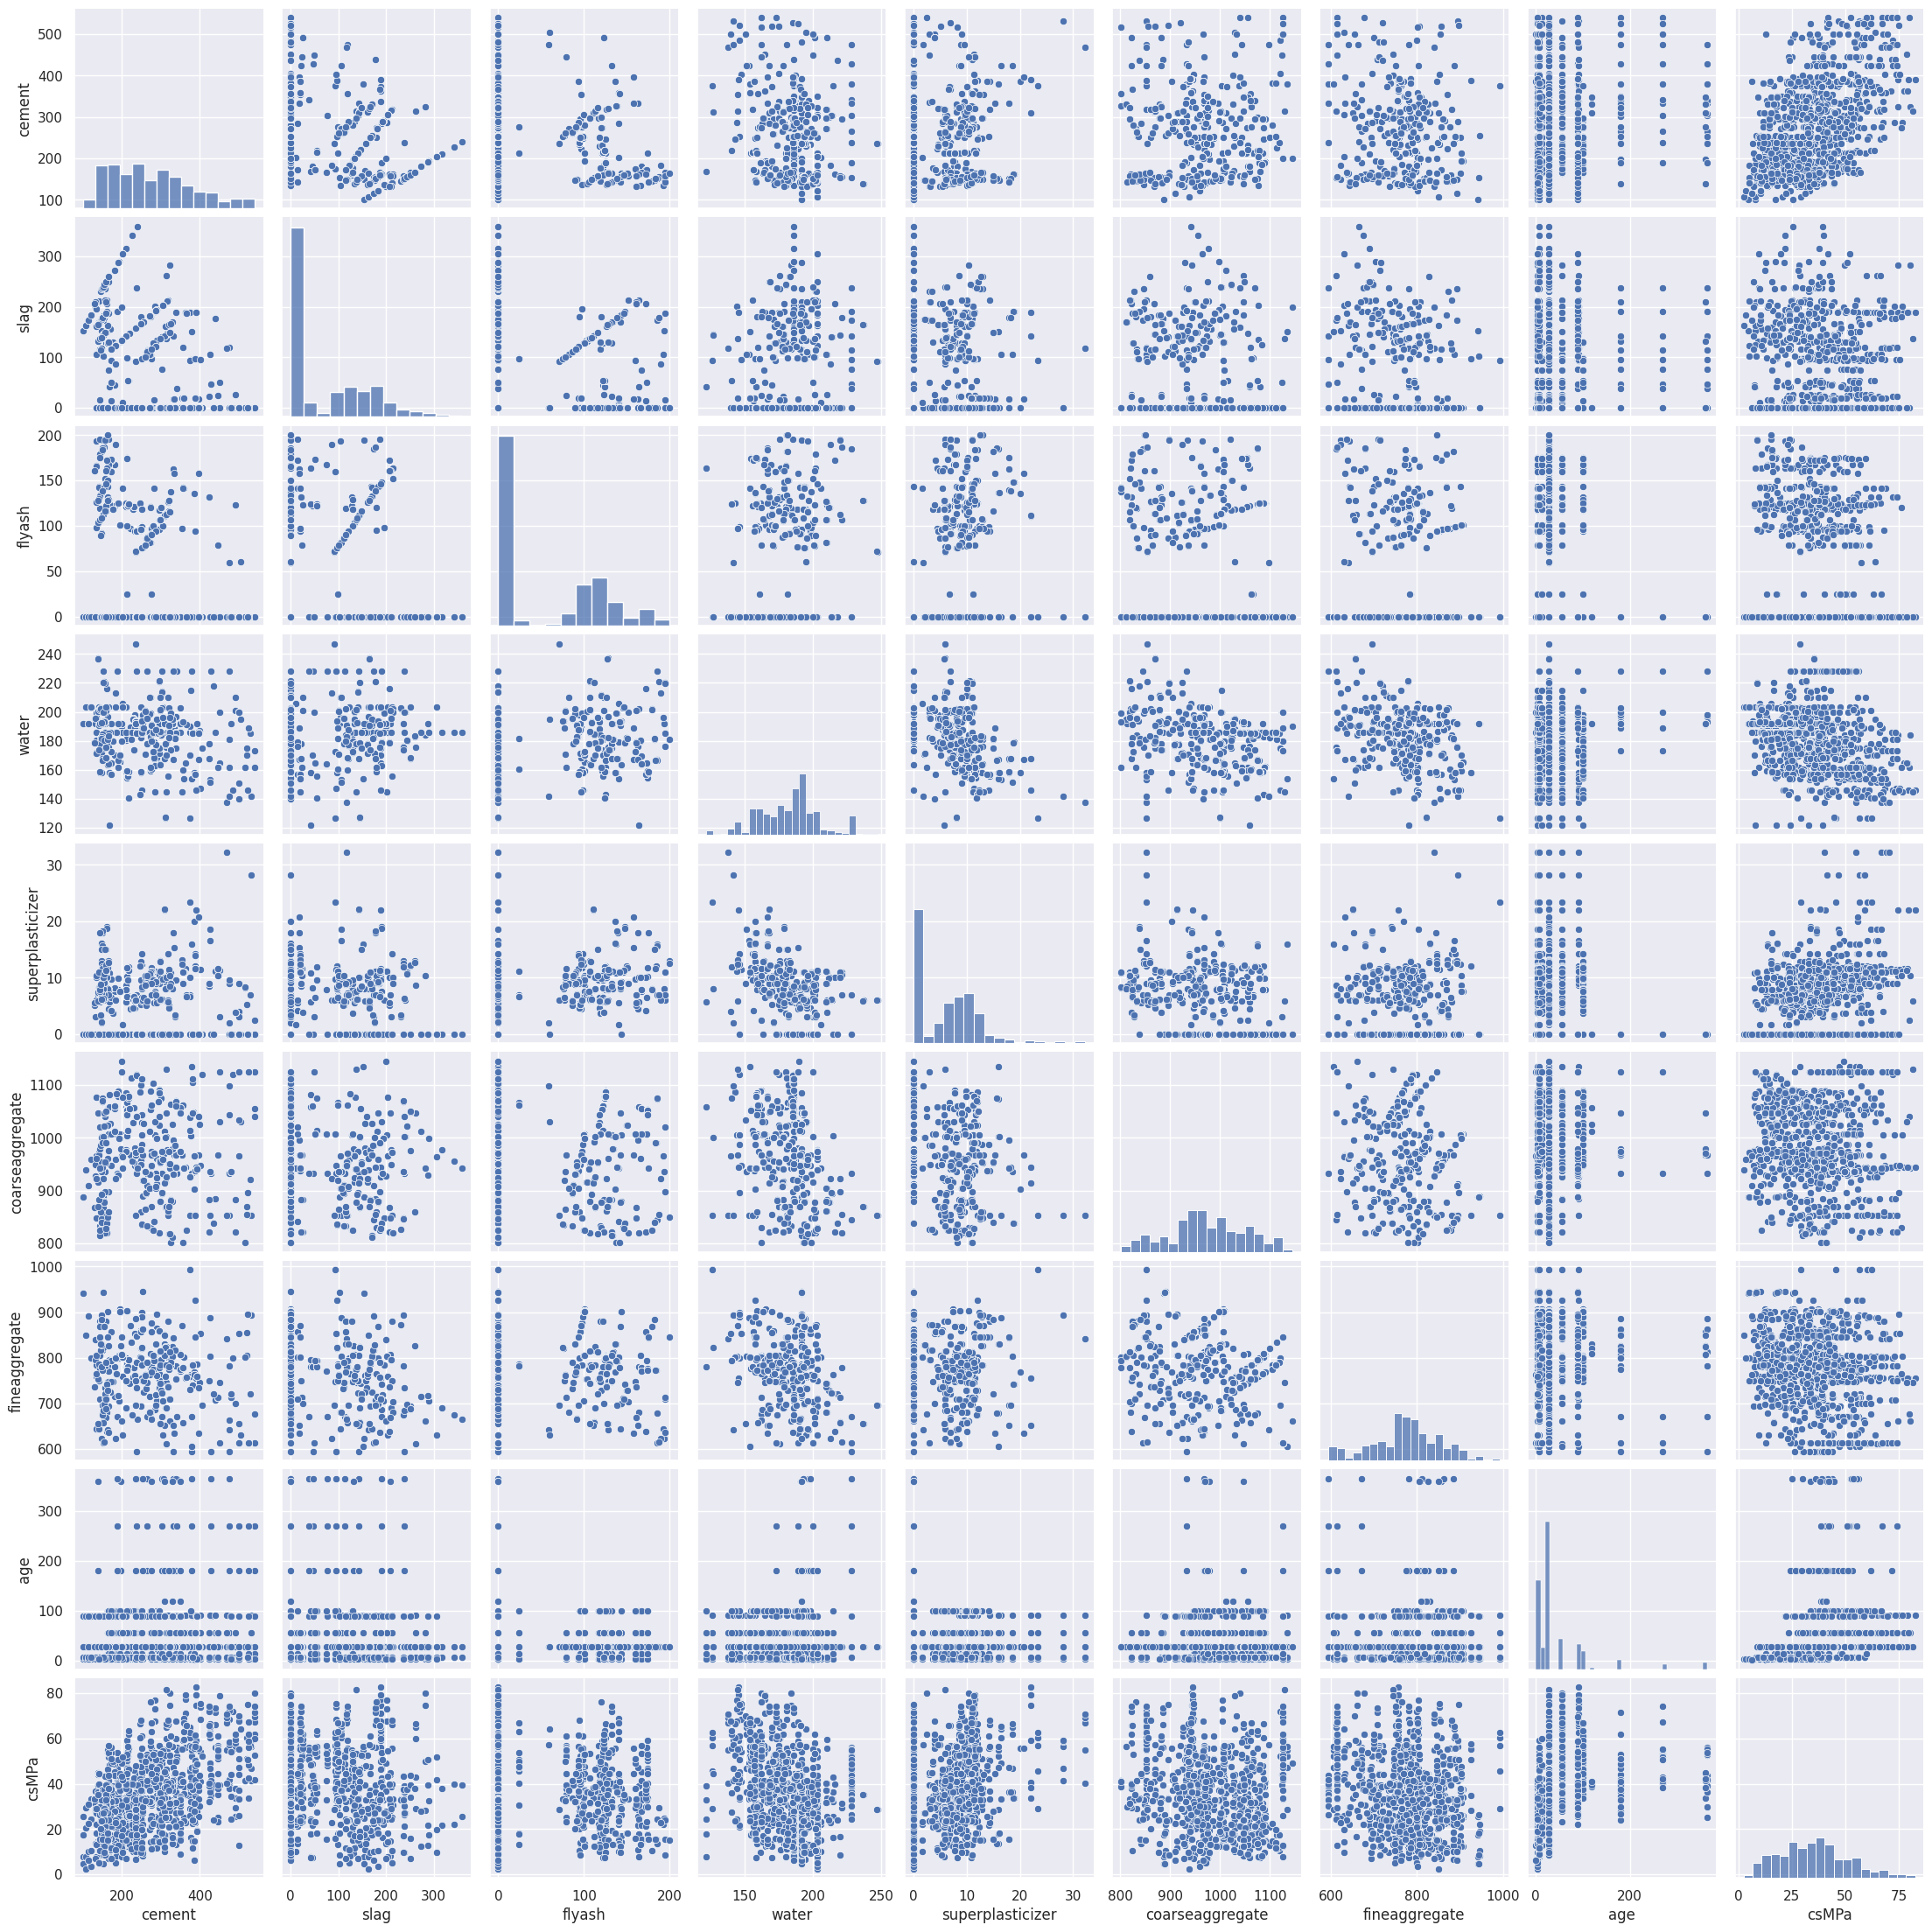

In [ ]:
sns.set_theme()# Set the default Seaborn theme
sns.pairplot(df)# Create a pair plot to visualize pairwise relationships in the DataFrame 'df'

Distribution of Each Variable

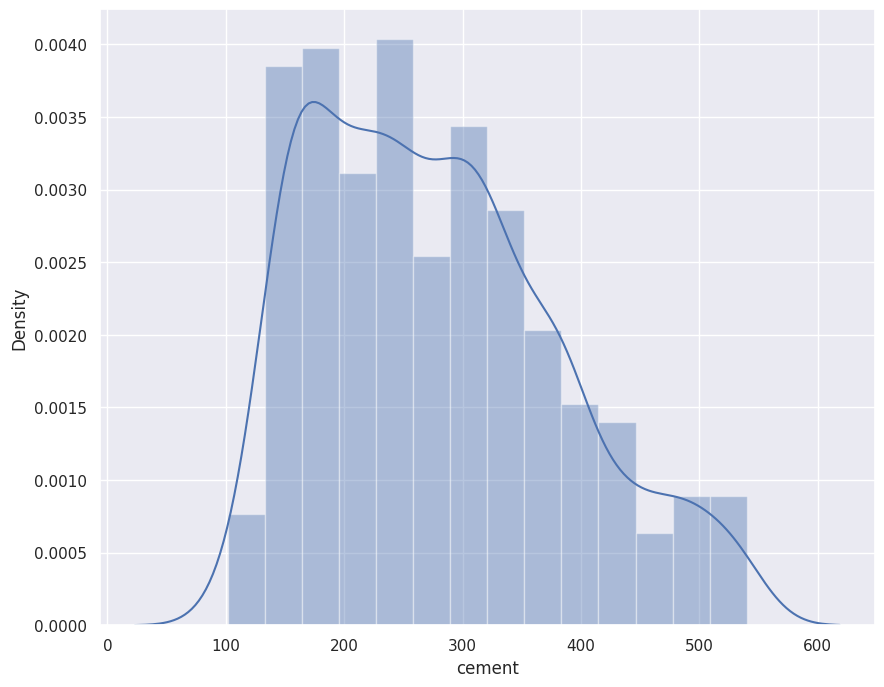

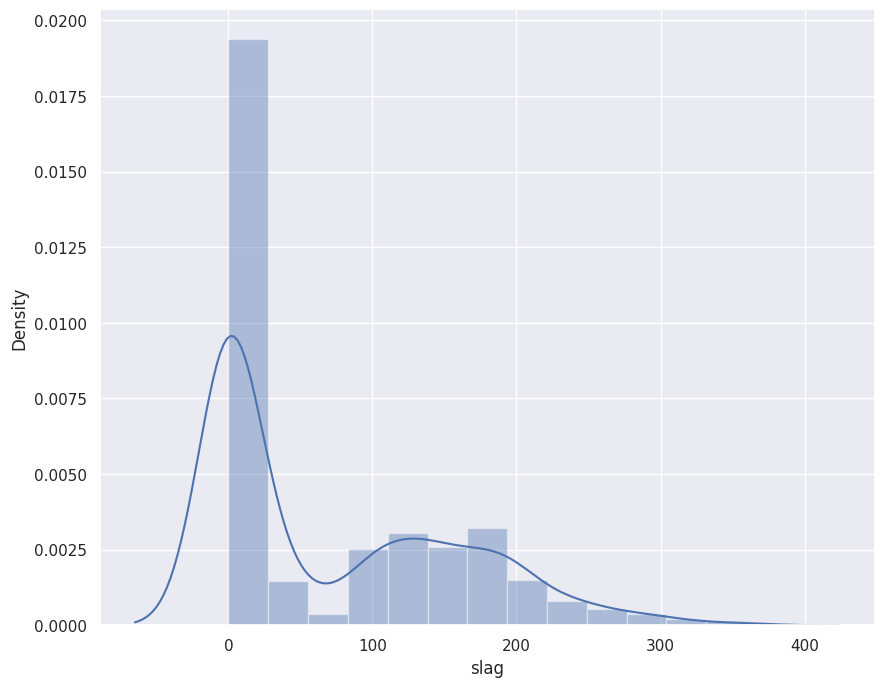

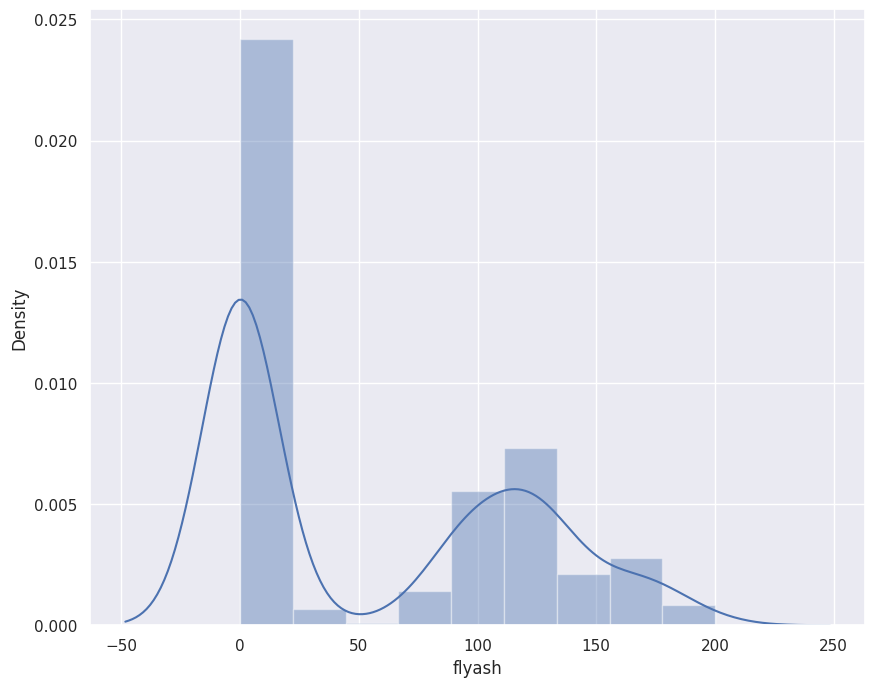

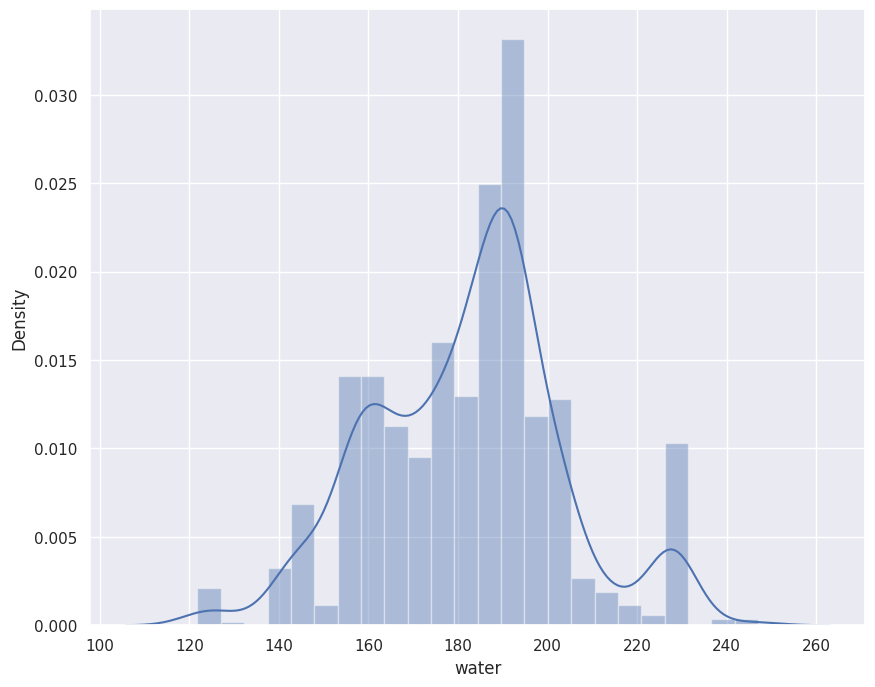

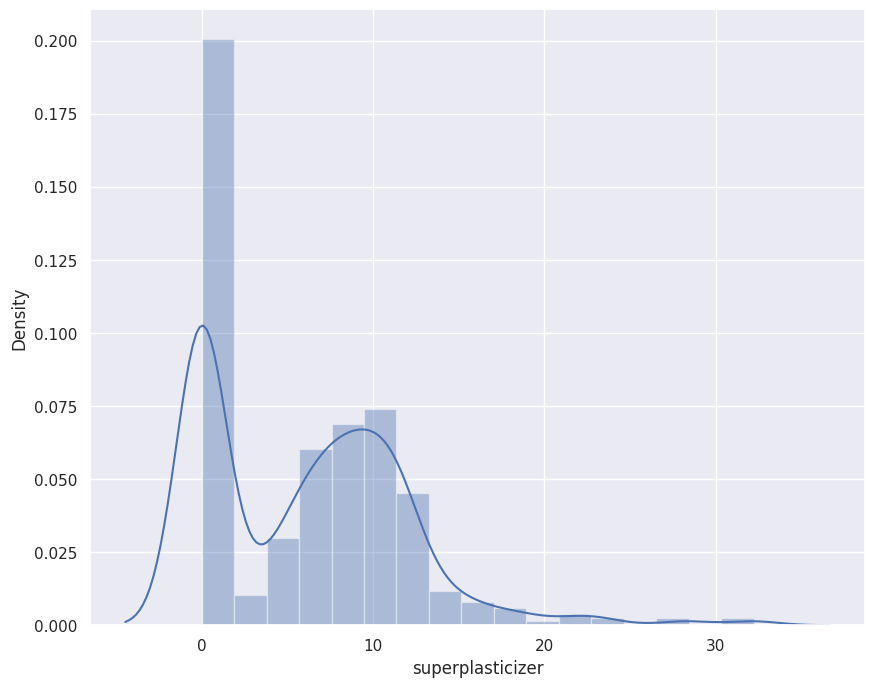

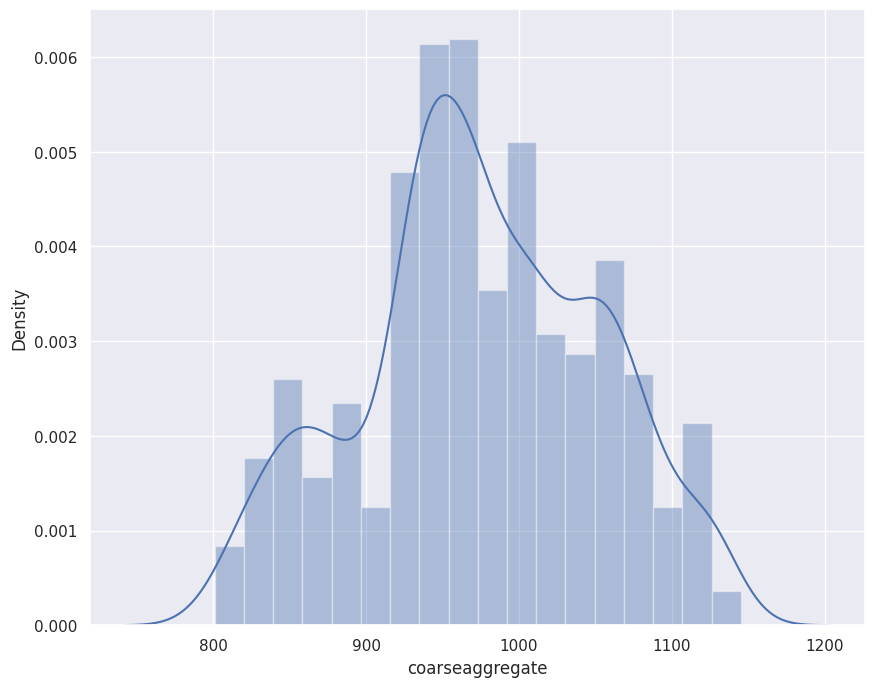

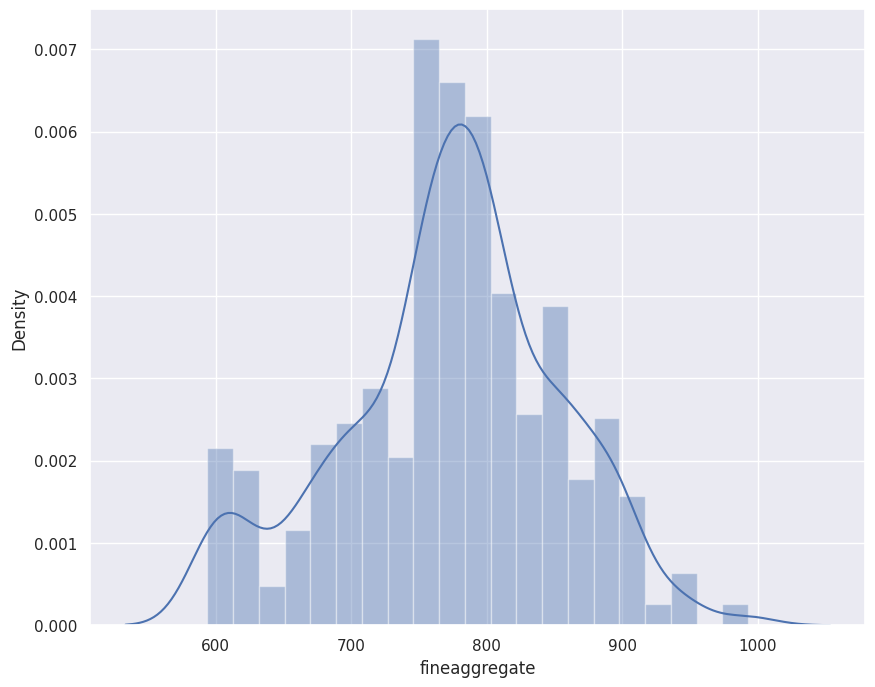

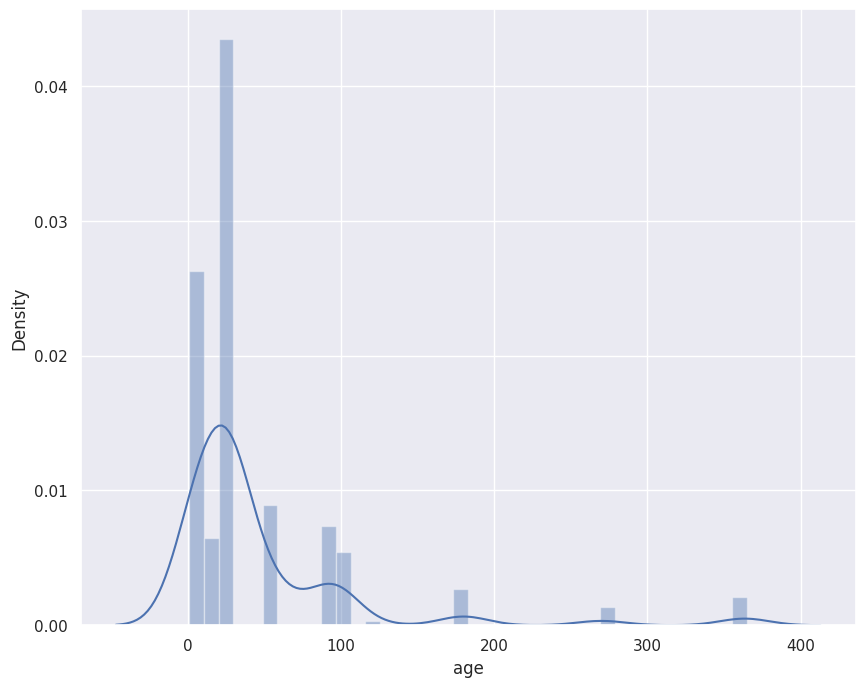

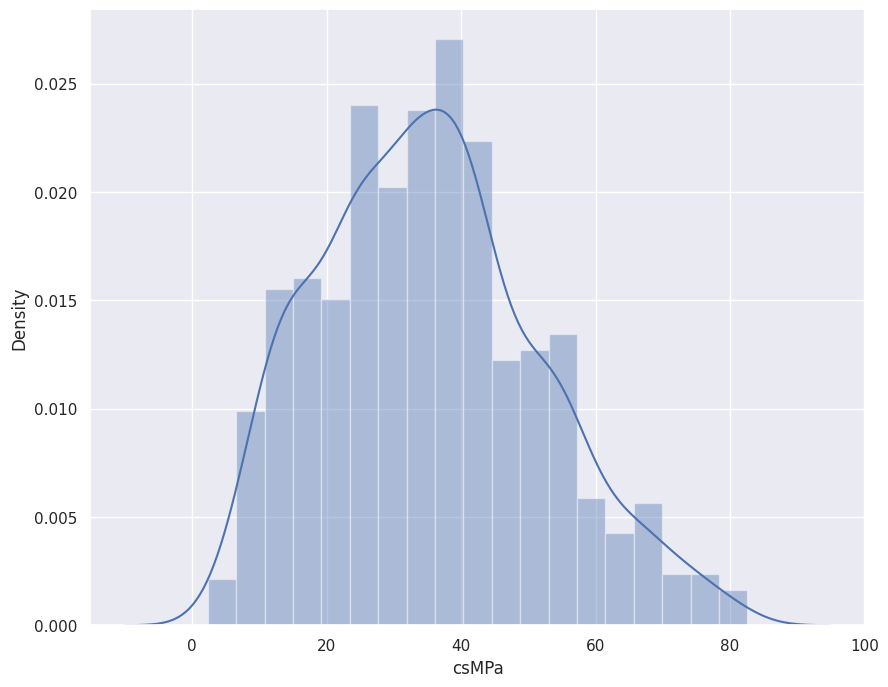

In [ ]:
# Visualize the distribution of each column in the DataFrame using Seaborn's distplot
for col in df.columns:
    plt.figure(figsize=(10,8))
    sns.distplot(df[col])
    plt.show()

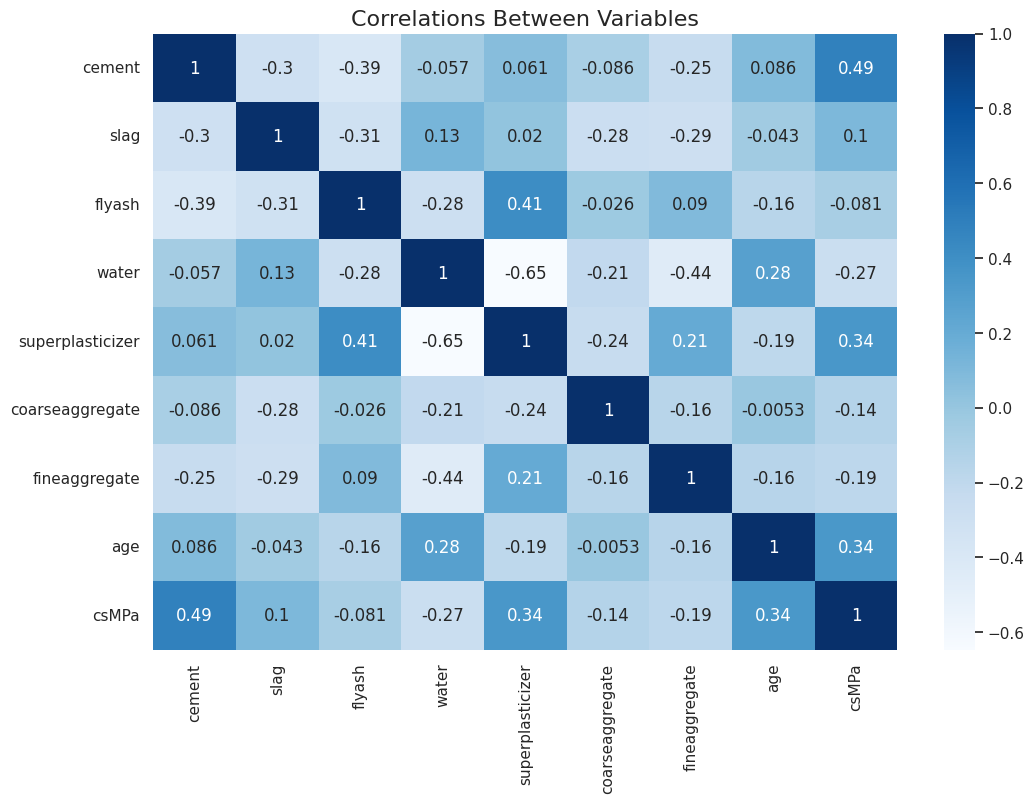

In [ ]:
# Visualize the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

**Build Primary Model**

In [ ]:
X = df.drop("csMPa", axis=1)
y = df["csMPa"]

In [ ]:
# Assuming 'X' is your feature matrix (excluding the 'price' column) and 'y' is your target variable ('price')
X_train, X_test, y_train, y_test = train_test_split(df.drop('csMPa', axis=1), df['csMPa'], test_size=0.2, random_state=42)


In [ ]:
# Model 1: Linear Regression
model_lr = LinearRegression() #model linear regression
model_lr.fit(X_train, y_train) #distrubite the x and x train for linear regression

LinearRegression()

In [ ]:
model_rf = RandomForestRegressor(random_state=42) #random _stae42 is for having constant data of dataset
model_rf.fit(X_train, y_train) #train and test for model random forest regression

RandomForestRegressor(random_state=42)

In [ ]:
# Evaluate Linear Regression model
y_pred_lr = model_lr.predict(X_test) #line uses the trained linear regression model (model_lr) to make predictions on the test data (X_test) and stored in y_pred_lr.
mse_lr = mean_squared_error(y_test, y_pred_lr) #MSE is calculated for the linear regression model
print(f'Mean Squared Error (Linear Regression): {mse_lr}') #print mean square for linear regression

# Evaluate Random Forest Regression model
y_pred_rf = model_rf.predict(X_test)  #line uses the trained Random forest regression model (model_lr) to make predictions on the test data (X_test) and stored in y_pred_lr
mse_rf = mean_squared_error(y_test, y_pred_rf) #calculate the mean square
print(f'Mean Squared Error (Random Forest Regression): {mse_rf}') #print mean square for random forest regression model


Mean Squared Error (Linear Regression): 125.2456480505019
Mean Squared Error (Random Forest Regression): 27.61734999419001


In [ ]:
# Compare and choose the best model based on the metrics
if mse_lr < mse_rf and r2_lr > r2_rf:#if case to check the best model
    print("Linear Regression is the better-performing model.")
else:
    print("Random Forest is the better-performing model.") #print if case doesnot statifiys


Random Forest is the better-performing model.


**Hyper-parameter Optimization with Cross-Validation**

In [ ]:
# Defining  the parameter grid for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False]
}

# Creating  Linear Regression model
model_lr = LinearRegression()

# Performing  GridSearchCV
grid_search_lr = GridSearchCV(model_lr, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

# Print the best hyperparameters for Linear Regression
best_params_lr = grid_search_lr.best_params_ #to find best hyperparameter
print("Best Hyperparameters for Linear Regression:", best_params_lr) #print best hyperparmeters


Best Hyperparameters for Linear Regression: {'fit_intercept': False}


In [ ]:
# define smaller parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Creating  Random Forest model
model_rf = RandomForestRegressor(random_state=42)

# Performing  GridSearchCV with verbose and limited combinations
grid_search_rf = GridSearchCV(model_rf, param_grid=param_grid_rf, cv=5, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Print the detailed results
print("Grid Search Results:")
print(grid_search_rf.cv_results_)

# Print the best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Grid Search Results:
{'mean_fit_time': array([0.33909168, 0.66429749, 0.41267543, 1.02047381, 0.42709274,
       0.57577248, 0.26009588, 0.52549419, 0.28994508, 0.5844583 ,
       0.26869879, 0.53146448, 0.26359444, 0.53852043, 0.3955101 ,
       0.89970956]), 'std_fit_time': array([0.00680502, 0.05437452, 0.05082521, 0.05034227, 0.04689231,
       0.08020303, 0.00250139, 0.0134571 , 0.0075618 , 0.01016838,
       0.01339765, 0.00950774, 0.00868722, 0.03237274, 0.09009623,
       0.10248243]), 'mean_score_time': array([0.01819215, 0.02618012, 0.0199266 , 0.03509727, 0.01737304,
       0.0217412 , 0.01195302, 0.02055287, 0.01261964, 0.02059369,
       0.01185436, 0.02072186, 0.0115581 , 0.0224041 , 0.01743755,
       0.02753201]), 'std_score_time': array([0.00924638, 0.00811992, 0.00759111, 0.0099903 , 0.00626899,
       0.00164731, 0.00052489, 0.00055199, 0.00038969, 0.00046442,
       0.00030738, 0.00089844, 0.00013092, 0.00

**Feature Selection**

In [ ]:
# Assuming model_lr is the best Linear Regression model from previous steps
selected_model = model_lr

# Assuming X_train is the training data with all features
selector = RFE(selected_model, n_features_to_select=5)  # Choose the number of features you want to keep
selector = selector.fit(X_train, y_train) #selecting from x-train and y-train

# Get the selected features
selected_features = X_train.columns[selector.support_] #extracts the names of the selected features from the training data (X_train).
X_train_selected = selector.transform(X_train) # applies the transformation to the training data (X_train) using the feature selector
X_test_selected = selector.transform(X_test) #previous line, this one transforms the test data (X_test)


**Final Model**

In [ ]:
# Assuming model_lr is the best Linear Regression model from previous steps
final_model_lr = LinearRegression(**best_params_lr) #line creates an instance of the Linear Regression model (LinearRegression) using the best hyperparameters
final_model_lr.fit(X_train_selected, y_train)

# Assuming model_rf is the best Random Forest model from previous steps
final_model_rf = RandomForestRegressor(**best_params_rf, random_state=42) #This line fits the random forest regression model (final_model_rf) on the training data (X_train_selected,
final_model_rf.fit(X_train_selected, y_train)


RandomForestRegressor(random_state=42)